In [1]:
import os
import cv2
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.svm import SVC 
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm
import matplotlib.pyplot as plt
from ptflops import get_model_complexity_info
from scipy.stats import entropy
from scipy.stats import pearsonr
import torchvision.models as models
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from tqdm import tqdm
import matplotlib.pyplot as plt
from ptflops import get_model_complexity_info
from scipy.stats import entropy
from scipy.stats import pearsonr
import torchvision.models as models
from io import BytesIO
import pandas as pd
from scipy.stats import sem
import torch.nn.functional as F
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import math
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB 
from skimage.metrics import structural_similarity as ssim
from sklearn import metrics 
import itertools

import shap

In [91]:
import matplotlib as mpl
import pylab
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.color'] = 'r'
mpl.rcParams['font.weight'] = 200
plt.style.use('seaborn-whitegrid')
plt.rc('figure',figsize=(8,8))
mpl.axes.Axes.annotate
mpl.rcParams['font.family'] = "serif"
pylab.rcParams['ytick.major.pad']='15'
pylab.rcParams['xtick.major.pad']='15'
mpl.rcParams['font.weight'] = "semibold"
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['axes.linewidth'] = 4
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams['axes.edgecolor'] = 'black'
mpl.rcParams['axes.titlesize'] = 20
mpl.rcParams['legend.fontsize'] = 15

In [3]:
def load_data(file_path):
    data = pd.read_csv(file_path)
    return data

In [177]:
def preprocess_data(data):

    #X = data.drop(columns=["Cognitive_Load_Label"])
    X = data.drop(columns=["label"])
    y = data["label"]
    #y = data["Cognitive_Load_Label"]
    
    
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)
    
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    return X, y, label_encoder

In [178]:
def split_data(X, y, test_size=0.20, random_state=42):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

In [179]:
def analyze_labels(data, label_column):
    unique_classes = data[label_column].unique()  # Find unique classes
    class_counts = data[label_column].value_counts()  # Count samples per class
    
    print(f"Number of unique classes: {len(unique_classes)}")
    print("\nClasses and their sample counts:")
    print(class_counts)

In [180]:
data = load_data("EEGfeatures_with_labels.csv")
print("Data loaded successfully.")

Data loaded successfully.


In [181]:
#data = load_data("PPGfeatures_with_labels.csv")
#print("Data loaded successfully.")

In [182]:
data.head(5)

,ShannonEntropy_0,ShannonEntropy_1,ShannonEntropy_2,ShannonEntropy_3,MedianFreq_0,MedianFreq_1,MedianFreq_2,MedianFreq_3,Std_0,Std_1,...,BandPower_beta_1,BandPower_beta_2,BandPower_beta_3,BandPower_gamma_0,BandPower_gamma_1,BandPower_gamma_2,BandPower_gamma_3,MI_0,PLI_0,label
0,6.360649,6.306755,10.002474,7.191911,85.8,114.6,56.6,84.4,32.061341,27.603852,...,1.444642,120.873901,0.503801,0.625572,3.308251,938.983370,0.957668,0.838047,0.117057,1
1,6.718830,5.959228,9.984402,7.338912,83.0,31.1,76.1,38.9,32.026274,23.010700,...,1.063105,126.451029,0.416003,0.650411,2.372382,943.085065,0.943409,3.412117,0.027865,1
2,6.614333,5.946551,9.995242,7.332993,90.6,95.3,100.4,54.3,30.748537,22.257319,...,0.937130,108.797352,0.566946,0.683323,2.175736,954.340933,1.002169,1.640939,0.027344,1
3,6.181034,5.897674,10.036926,7.025405,82.4,51.2,20.4,58.9,24.771528,24.504576,...,1.245104,135.301583,0.321927,0.458879,3.001322,948.288957,0.813986,2.610624,0.126172,1
4,6.651620,6.004883,10.006555,7.496894,101.0,84.4,27.5,18.3,32.954740,23.439127,...,1.182783,115.742823,0.548304,0.625329,2.436957,961.504731,1.194271,1.051656,0.120182,1


In [183]:
print(data.columns)

Index(['ShannonEntropy_0', 'ShannonEntropy_1', 'ShannonEntropy_2',
       'ShannonEntropy_3', 'MedianFreq_0', 'MedianFreq_1', 'MedianFreq_2',
       'MedianFreq_3', 'Std_0', 'Std_1', 'Std_2', 'Std_3',
       'ShannonEntropy_delta_0', 'ShannonEntropy_delta_1',
       'ShannonEntropy_delta_2', 'ShannonEntropy_delta_3',
       'ShannonEntropy_theta_0', 'ShannonEntropy_theta_1',
       'ShannonEntropy_theta_2', 'ShannonEntropy_theta_3',
       'ShannonEntropy_alpha_0', 'ShannonEntropy_alpha_1',
       'ShannonEntropy_alpha_2', 'ShannonEntropy_alpha_3',
       'ShannonEntropy_beta_0', 'ShannonEntropy_beta_1',
       'ShannonEntropy_beta_2', 'ShannonEntropy_beta_3',
       'ShannonEntropy_gamma_0', 'ShannonEntropy_gamma_1',
       'ShannonEntropy_gamma_2', 'ShannonEntropy_gamma_3', 'HjorthMob_0',
       'HjorthMob_1', 'HjorthMob_2', 'HjorthMob_3', 'HjorthComp_0',
       'HjorthComp_1', 'HjorthComp_2', 'HjorthComp_3', 'BandPower_alpha_0',
       'BandPower_alpha_1', 'BandPower_alpha_2', 'Band

In [184]:
X, y, label_encoder = preprocess_data(data)
print("Data preprocessed successfully.")

Data preprocessed successfully.


In [185]:
y

array([1, 1, 1, ..., 1, 1, 1])

In [186]:
X.shape

(2520, 54)

In [187]:
y.shape

(2520,)

In [188]:
#analyze_labels(data, 'Cognitive_Load_Label') 
analyze_labels(data, 'label') 

Number of unique classes: 3

Classes and their sample counts:
1    1317
0     728
2     475
Name: label, dtype: int64


In [189]:
X.shape

(2520, 54)

In [190]:
X_train, X_test, y_train, y_test = split_data(X, y)
print("Data split successfully.")

Data split successfully.


In [191]:
print(X_train.shape, X_test.shape)

(2016, 54) (504, 54)


In [212]:
print(y_train.shape, y_test.shape)

torch.Size([2016]) torch.Size([504])


In [225]:
print(type(X_train), type(y_train), type(X_test), type(y_test))

<class 'torch.Tensor'> <class 'torch.Tensor'> <class 'torch.Tensor'> <class 'torch.Tensor'>


In [250]:
class CNN(nn.Module):
    def __init__(self, num_classes=3):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm1d(64)
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv1d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm1d(128)
        self.fc1 = nn.Linear(128 * 13, num_classes)  

    def forward(self, x):
        x = x.unsqueeze(1)  
        x = self.pool(F.relu(self.bn1(self.conv1(x))))  
        x = self.pool(F.relu(self.bn2(self.conv2(x))))  
        x = x.view(x.size(0), -1)  
        x = self.fc1(x)  
        return x

In [256]:
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)

# Create DataLoaders
batch_size = 8
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


In [257]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNN(num_classes=3).to(device)
print(model)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.003)

SimpleCNN(
  (conv1): Conv1d(1, 64, kernel_size=(3,), stride=(1,), padding=(1,))
  (bn1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv1d(64, 128, kernel_size=(3,), stride=(1,), padding=(1,))
  (bn2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=1664, out_features=3, bias=True)
)


In [258]:
# X_train = torch.randn(1242, 54)

# model = CNN(num_classes=3)

# # Pass through the model
# output = model(X_train)

# # Verify input and output shapes
# print("Input shape:", X_train.shape)  # Should be (1242, 8)
# print("Output shape:", output.shape)  # Should be (1242, 2)

In [259]:
num_epochs = 32
train_losses = []

print("Starting training...")
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    correct = 0
    total = 0

    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        optimizer.zero_grad()
        outputs = model(X_batch)
        #print(outputs)
        loss = 0.8 * criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        correct += (outputs.argmax(1) == y_batch).sum().item()
        total += y_batch.size(0)

    epoch_loss = total_loss / len(train_loader)
    train_losses.append(epoch_loss)
    epoch_accuracy = correct / total

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}")

Starting training...
Epoch [1/32], Loss: 0.9154, Accuracy: 0.5258
Epoch [2/32], Loss: 0.6903, Accuracy: 0.6106
Epoch [3/32], Loss: 0.5760, Accuracy: 0.6815
Epoch [4/32], Loss: 0.5587, Accuracy: 0.7009
Epoch [5/32], Loss: 0.5142, Accuracy: 0.7227
Epoch [6/32], Loss: 0.5074, Accuracy: 0.7207
Epoch [7/32], Loss: 0.4852, Accuracy: 0.7351
Epoch [8/32], Loss: 0.4294, Accuracy: 0.7773
Epoch [9/32], Loss: 0.4466, Accuracy: 0.7698
Epoch [10/32], Loss: 0.4174, Accuracy: 0.7827
Epoch [11/32], Loss: 0.4066, Accuracy: 0.7842
Epoch [12/32], Loss: 0.3796, Accuracy: 0.8056
Epoch [13/32], Loss: 0.3762, Accuracy: 0.8031
Epoch [14/32], Loss: 0.3436, Accuracy: 0.8269
Epoch [15/32], Loss: 0.3499, Accuracy: 0.8259
Epoch [16/32], Loss: 0.3295, Accuracy: 0.8299
Epoch [17/32], Loss: 0.3059, Accuracy: 0.8626
Epoch [18/32], Loss: 0.3103, Accuracy: 0.8323
Epoch [19/32], Loss: 0.2938, Accuracy: 0.8522
Epoch [20/32], Loss: 0.2868, Accuracy: 0.8497
Epoch [21/32], Loss: 0.2702, Accuracy: 0.8686
Epoch [22/32], Loss: 0

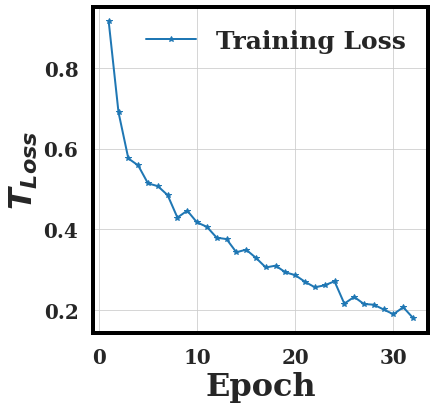

In [274]:
plt.figure(figsize=(6, 6))
plt.plot(range(1, num_epochs + 1), train_losses, marker='*', label='Training Loss')
plt.xlabel('Epoch', fontweight = 'semibold', fontsize=32)
plt.ylabel("$T_{Loss}$", fontweight = 'semibold', fontsize=32)
#plt.title('Training Loss Over Epochs')
plt.legend(['Training Loss'], prop=dict(weight='semibold', size = 25))  
plt.grid(True)
plt.savefig('loss_beta_decode.png',transparent=False, bbox_inches='tight', pad_inches=0)
plt.show()


Evaluating...


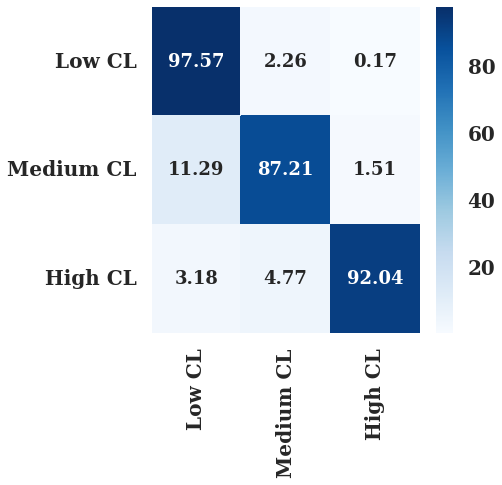


Classification Report:
              precision    recall  f1-score   support

           0     0.8098    0.9757    0.8850       576
           1     0.9676    0.8721    0.9174      1063
           2     0.9533    0.9204    0.9366       377

    accuracy                         0.9107      2016
   macro avg     0.9102    0.9227    0.9130      2016
weighted avg     0.9199    0.9107    0.9117      2016



In [119]:
print("\nEvaluating...")
model.eval()
y_true = []
y_pred = []

with torch.no_grad():
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        outputs = model(X_batch)
        preds = outputs.argmax(1)

        y_true.extend(y_batch.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

#classes = ['Low CL','High CL']
classes = ['Low CL', 'Medium CL','High CL']
conf_matrix = confusion_matrix(y_true, y_pred)
conf_matrix_percentage = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_percentage, annot=True, fmt='.2f', cmap='Blues', xticklabels=classes, yticklabels=classes, annot_kws={"size": 18})
#plt.xlabel('Predicted Class')
#plt.ylabel('True Class')
#plt.title('Confusion Matrix')
plt.savefig('CALM.png',transparent=True, bbox_inches='tight', pad_inches=0)
plt.show()

print("\nClassification Report:")
print(classification_report(y_true, y_pred, digits=4))

# Traditional ML Algorithms

In [17]:
accuracy_scores = np.zeros(4)

In [18]:
classes = ['Low CL','High CL']
#classes = ['Low CL', 'Medium CL','High CL']

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


 MLPClassifier Accuracy: 86.02409638554217%
              precision    recall  f1-score   support

      Low CL       0.82      0.71      0.76       132
     High CL       0.87      0.93      0.90       283

    accuracy                           0.86       415
   macro avg       0.85      0.82      0.83       415
weighted avg       0.86      0.86      0.86       415



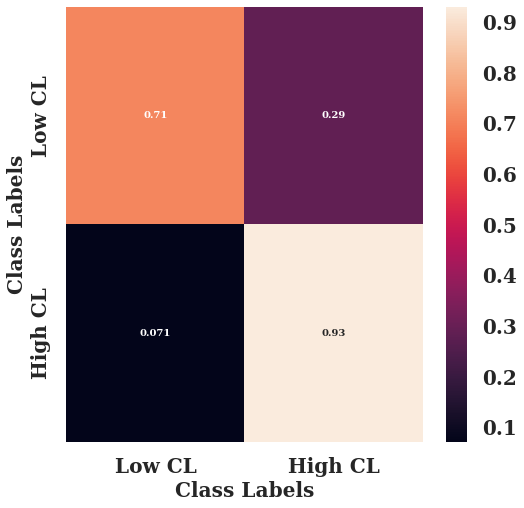

In [180]:
clf =  MLPClassifier().fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy_scores[0] = accuracy_score(y_test, prediction)*100
cf_matrix = confusion_matrix(y_test, prediction)
df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [i for i in classes],
                     columns = [i for i in classes])
#plt.figure(figsize = (12,10))
sns.heatmap(df_cm, annot=True)
plt.xlabel('Class Labels', fontweight='semibold')
plt.ylabel('Class Labels', fontweight='semibold')
#plt.savefig("Images/New_Confusion_Matrix_BAR_Gender_Variations.png", format='png',bbox_inches='tight', pad_inches=0,dpi=300)
report = metrics.classification_report(y_test, prediction, target_names=classes)
#df = pd.DataFrame(report).transpose()
#df.to_csv('Classification_Report_MLP_Sreeni_Dataset.csv')
print(' MLPClassifier Accuracy: {}%'.format(accuracy_scores[0]))
#cm.numpy.genfromtxt('C:/localpath/test.csv', delimiter=',')
#plt.savefig('Confusion_Matrix_MLP_Participant_Hand_and_Palm_Dataset',transparent=True, bbox_inches='tight', pad_inches=0)
print(report)
#plt.show()

 Naive Bayes Classifier Accuracy : 83.855421686747%
              precision    recall  f1-score   support

      Low CL       0.73      0.79      0.76       132
     High CL       0.90      0.86      0.88       283

    accuracy                           0.84       415
   macro avg       0.81      0.83      0.82       415
weighted avg       0.84      0.84      0.84       415



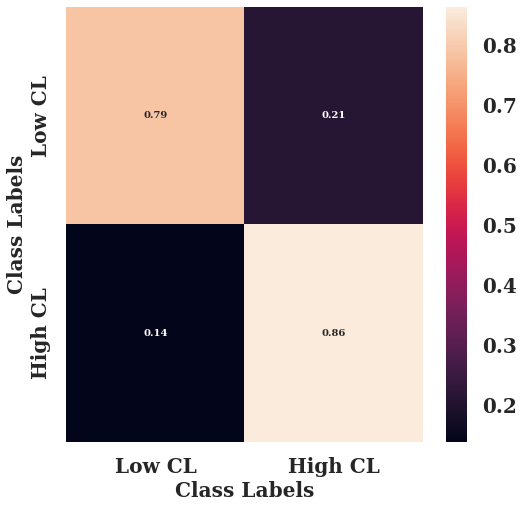

In [181]:
gnb = GaussianNB()
clf =  gnb.fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy_scores[0] = accuracy_score(y_test, prediction)*100
cf_matrix = confusion_matrix(y_test, prediction)
df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [i for i in classes],
                     columns = [i for i in classes])
#plt.figure(figsize = (12,10))
sns.heatmap(df_cm, annot=True)
plt.xlabel('Class Labels', fontweight='semibold')
plt.ylabel('Class Labels', fontweight='semibold')
report = metrics.classification_report(y_test, prediction, target_names=classes)
#df = pd.DataFrame(report).transpose()
#df.to_csv('Classification_Report_NB_Sreeni_Dataset.csv')
print(' Naive Bayes Classifier Accuracy : {}%'.format(accuracy_scores[0]))
#plt.savefig('Confusion_Matrix_Naive_Bayes_Participant_Hand_and_Palm_Dataset',transparent=True, bbox_inches='tight', pad_inches=0)
print(report)
#plt.show()

Random Forest Classifier Accuracy: 83.855421686747%
              precision    recall  f1-score   support

      Low CL       0.73      0.79      0.76       132
     High CL       0.90      0.86      0.88       283

    accuracy                           0.84       415
   macro avg       0.81      0.83      0.82       415
weighted avg       0.84      0.84      0.84       415



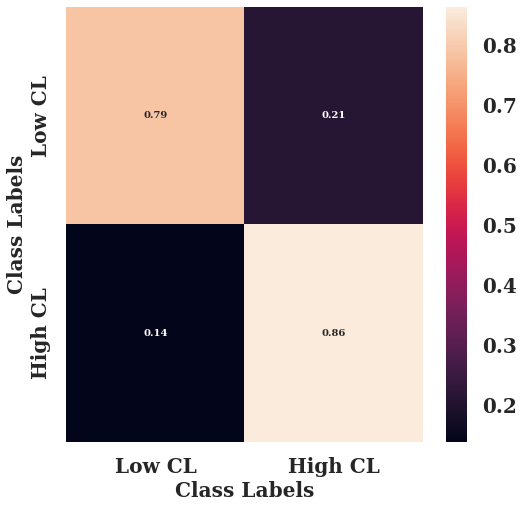

In [182]:
clf1 = RandomForestClassifier(n_estimators=100, random_state=1200).fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy_scores[0] = accuracy_score(y_test, prediction)*100
cf_matrix = confusion_matrix(y_test, prediction)
df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [i for i in classes],
                     columns = [i for i in classes])
#plt.figure(figsize = (12,10))
sns.heatmap(df_cm, annot=True)
plt.xlabel('Class Labels', fontweight='semibold')
plt.ylabel('Class Labels', fontweight='semibold')
report = metrics.classification_report(y_test, prediction, target_names=classes)
#df = pd.DataFrame(report).transpose()
#df.to_csv('Classification_Report_RF_Sreeni_Dataset.csv')
print('Random Forest Classifier Accuracy: {}%'.format(accuracy_scores[0]))
#plt.savefig('Confusion_Matrix_RF_Participant_Hand_and_Palm_Dataset',transparent=True, bbox_inches='tight', pad_inches=0)
print(report)
plt.show()

 Decision Tree Classifier Accuracy: 82.65060240963855%
              precision    recall  f1-score   support

      Low CL       0.75      0.67      0.71       132
     High CL       0.86      0.90      0.88       283

    accuracy                           0.83       415
   macro avg       0.80      0.79      0.79       415
weighted avg       0.82      0.83      0.82       415



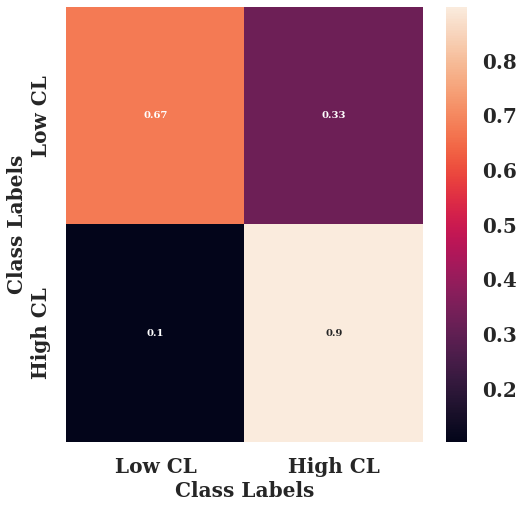

In [45]:
clf =  tree.DecisionTreeClassifier().fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy_scores[0] = accuracy_score(y_test, prediction)*100
cf_matrix = confusion_matrix(y_test, prediction)
df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [i for i in classes],
                     columns = [i for i in classes])
#plt.figure(figsize = (12,10))
sns.heatmap(df_cm, annot=True)
plt.xlabel('Class Labels', fontweight='semibold')
plt.ylabel('Class Labels', fontweight='semibold')
report = metrics.classification_report(y_test, prediction, target_names=classes)
#df = pd.DataFrame(report).transpose()
#df.to_csv('Classification_Report_DT_Sreeni_Dataset.csv')
print(' Decision Tree Classifier Accuracy: {}%'.format(accuracy_scores[0]))
#plt.savefig('Confusion_Matrix_DT_Participant_Hand_and_Palm_Dataset',transparent=True, bbox_inches='tight', pad_inches=0)
print(report)
plt.show()

  SVM RBF MulitclassClassifier Accuracy: 84.57831325301206%
              precision    recall  f1-score   support

      Low CL       0.77      0.73      0.75       132
     High CL       0.88      0.90      0.89       283

    accuracy                           0.85       415
   macro avg       0.83      0.81      0.82       415
weighted avg       0.84      0.85      0.84       415



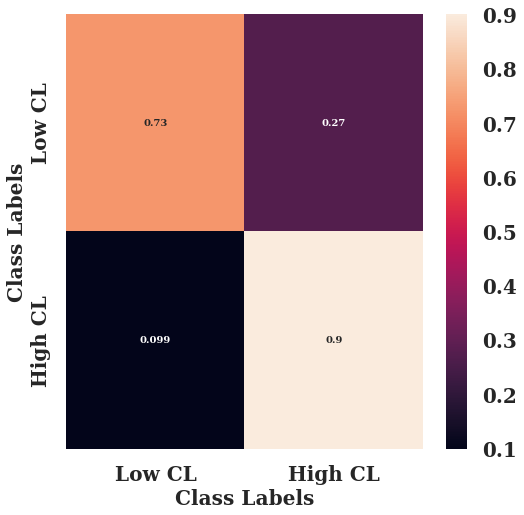

In [46]:
clf = SVC(kernel = 'rbf').fit(X_train, y_train)
#clf = SVC(kernel='rbf', random_state=0, gamma=1, C=1).fit(X_train, y_train) 
prediction = clf.predict(X_test) 
accuracy_scores[0] = accuracy_score(y_test, prediction)*100
cf_matrix = confusion_matrix(y_test, prediction)
df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [i for i in classes],
                     columns = [i for i in classes])
#plt.figure(figsize = (12,10))
sns.heatmap(df_cm, annot=True)
plt.xlabel('Class Labels', fontweight='semibold')
plt.ylabel('Class Labels', fontweight='semibold')
report = metrics.classification_report(y_test, prediction, target_names=classes)
#df = pd.DataFrame(report).transpose()
#df.to_csv('Classification_Report_MLP_Sreeni_Dataset.csv')
print('  SVM RBF MulitclassClassifier Accuracy: {}%'.format(accuracy_scores[0]))
#cm.numpy.genfromtxt('C:/localpath/test.csv', delimiter=',')
#plt.savefig('Confusion_Matrix_SVM_RBF_Participant_Hand_and_Palm_Dataset',transparent=True, bbox_inches='tight', pad_inches=0)
print(report)
plt.show()

# SHAP Analysis

In [140]:
X = pd.read_csv('EEGfeatures.csv')  
Y = pd.read_csv('EEGlabels.csv')    

#print(X.head(5))

# Ensure that Y is a Series
Y = Y.squeeze()  # This is necessary if the labels are loaded as a DataFrame with a single column

# Split into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Train Random Forest Classifier
clf1 = RandomForestClassifier(n_estimators=80, random_state=1200)
clf1.fit(X_train, Y_train)

explainer = shap.TreeExplainer(clf1)  
shap_values = explainer.shap_values(X_test)

#classes = ['Low Cognitive Load', 'High Cognitive Load']

# SHAP Explainer
explainer = shap.TreeExplainer(clf1)  # SHAP explainer for your model
shap_values = explainer.shap_values(X_test)

plt.figure(dpi=300)
shap.summary_plot(shap_values, X_test, class_names=classes, max_display=5, show=False)
plt.savefig('shap_summary_plot_EEG_features.png', bbox_inches='tight', dpi=300)
plt.close()
#plt.show()

print("SHAP summary plot showing all features saved as 'shap_summary_plot_all_features.png'.")

SHAP summary plot showing all features saved as 'shap_summary_plot_all_features.png'.


In [138]:
#shap.plots.waterfall(shap_values)

In [139]:
#shap.plots.heatmap(shap_values)

In [ ]:
X = pd.read_csv('GSRfeatures.csv')  # Replace with the actual path to your features CSV
Y = pd.read_csv('GSRlabels.csv')    # Replace with the actual path to your labels CSV

# Ensure that Y is a Series
Y = Y.squeeze()  # This is necessary if the labels are loaded as a DataFrame with a single column

# Split into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Train Random Forest Classifier
clf0 = RandomForestClassifier(n_estimators=100, random_state=1200)
clf0.fit(X_train, Y_train)

# Compute standard deviation of feature importances
std = np.std([tree.feature_importances_ for tree in clf0.estimators_], axis=0)

# Extract feature importances
feature_importances = pd.Series(clf0.feature_importances_, index=X_train.columns)

# Print accuracy on test data
print('Score of RF model on test split\n', clf0.score(X_test, Y_test))

# Plot feature importances
fig, ax = plt.subplots()
feature_importances.plot.bar(yerr=std, ax=ax, color='red')  # Change 'orange' to your desired color
ax.set_title("PPG Feature Importances Random Forest Clf")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.show()